# Bayesian methodology: An lightning overview

## Quotes

Here are some representative quotes about Bayesian statistics.

The Good:
> _The subjectivist states his judgements, whereas the objectivist sweeps them under the carpet by calling assumptions knowledge, and he basks in the glorious objectivity of science._ I.J. Good

The Bad: 
> _If they [Bayesians] would only do as he [Rev. Bayes] did and publish posthumously we should all be saved a lot of trouble._ Maurice G. Kendall

The Reality:
> _The practising Bayesian is well advised to become friends with as many numerical analysts as possible._ James O. Berger







## A divisive equation

So what's all the fuss about? Well, it comes down to interpreting one little equation called _Bayes' Rule_. To get there, consider the conditional probability of A happening given B:

$$ p(A|B) = \frac{p(A\&B)}{p(B)} $$

<img src="conditional_probability.gif">

Rearranging, we get:

$$ p(A\&B) = p(A|B)p(B) $$

By just swapping the A's and B's above, we can also get:

$$ p(A\&B) = p(B|A)p(A) $$

Which gives us $$ p(B|A) = \frac{p(A|B)p(B)}{p(A)} $$

Woah! That's incredible! To see how useful this is, let's change our A's and B's to $h$'s and $d$'s. Bayes' Rule is

$$ p(h|d) = \frac{p(d|h)p(h)}{p(d)} $$

where $h$ is a hypothesis and $d$ is some observed data. The lefthand side is the probability of a hypothesis being true given some data. That's one view of what science is. And the righthand side gives us an easier way of calculating it.

Each term in the equation has a special name:

- $ p(h|d) $ is called the _posterior_. This is what we want to know.
- $ p(d|h) $ is called the _likelihood_. This is the probability of observing some data $d$ assuming $h$ is true.
- $ p(h) $ is called the _prior_. This is the probability of hypothesis $h$ being true **before** any data is observed.
- $ p(d) $ is called the _evidence_. This is not always needed, because often we are trying to distinguish between different hypotheses, and this doesn't have anything to do with hypotheses.

The controversial nature of Bayes' Rule is in interpreting the alternative hypotheses as random (i.e. things that can have probabilities) and in the prior probability of a hypothesis being true. But enough background, let's use it!

## Obligatory coin flipping example 
### (adapted from Cam Davidson-Pilon's excellent [_Bayesian Methods for Hackers_](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers))

You're given a coin and told it may not be fair. That is, as opposed to a normal coin that comes up heads 50% of the time, this coin comes up heads $p$% of the time, but you have no idea what $p$ is. Let's assume you have no reason to assume any particular value of $p$. You want to know what $p$ is, so you start collecting data. You start flipping the coin and writing down whether it is H or T. **How do your beliefs (hypotheses) about the true value of $p$ change as you collect more and more data?**

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy import stats

np.random.seed(sum(map(ord, 'Bayes')))

In [69]:
def plot_bayesian_updating(true_p):
    n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
    data = stats.bernoulli.rvs(true_p, size=n_trials[-1])
    x = np.linspace(0, 1, 100)
    dist = stats.beta
    
    plt.figure(figsize=(14,10))
    for k, N in enumerate(n_trials):
        ax = plt.subplot(len(n_trials)/2, 2, k+1)
        if k == 0:
            plt.xlabel("$p$, probability of heads")
        heads = data[:N].sum()
        y = dist.pdf(x, 1 + heads, 1 + N - heads)
        label = '{} tosses,\n {} heads'.format(N, heads)
        plt.plot(x, y, label=label)
        plt.fill_between(x, 0, y, color="#FF1A1A", alpha=0.4)
        plt.vlines(true_p, 0, 4, color="k", linestyles="--", lw=1)
        leg = plt.legend()
        leg.get_frame().set_alpha(0.4)
        plt.autoscale(tight=True)
        ax.tick_params(labelleft='off')
    
    plt.suptitle("Bayesian updating of posterior probabilities", y=1.02, fontsize=14)

    plt.tight_layout()

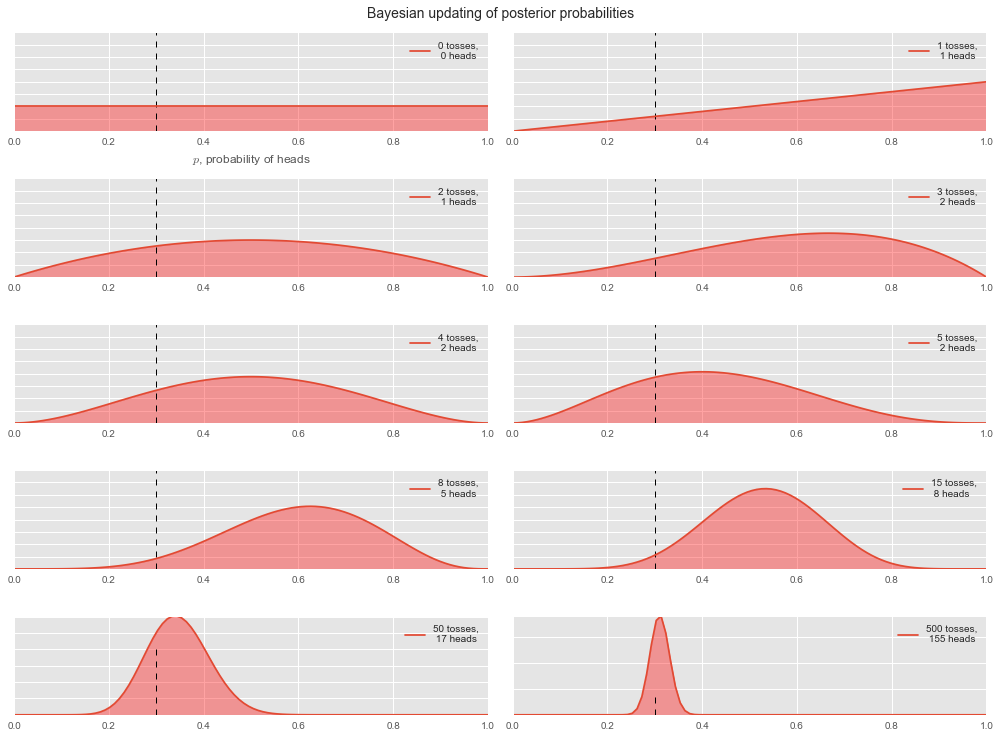

In [68]:
plot_bayesian_updating(0.30)

## Further resources

- Bayes' theorem: The theory that would not die (Sharon Bertsch McGrayne)
- Doing Bayesian data analysis a.k.a The puppy book (John Kruschke)
- [Bayesian methods for hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers) (Cam Davidson-Pilon) 
- [Bayesian methods made as simple as possible](https://www.youtube.com/watch?v=bobeo5kFz1g) (Allen Downey)

## More quotes


> _Bayesian statistics is difficult in the sense that thinking is difficult._ Donald A. Berry

> _Any approach to scientific inference which seeks to legitimize an answer in reponse to complex uncertainty is, for me, a totalitarian parody of a would-be rational learning process._ Adrian F. M. Smith